In [82]:
import pandas as pd
import config
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


sns.set(style="ticks", context="poster")
plt.style.use("dark_background")


In [101]:
actives_query = 'SELECT c.PUBCHEM_CID as CID, c.PUBCHEM_AID as AID, c.PUBCHEM_SID as SID ' \
                'FROM concise c ' \
                'WHERE c.PUBCHEM_ACTIVITY_OUTCOME == "Active"'
active_cmps = pd.read_sql_query(actives_query, con=config.Config.DB_URI)
active_cmps['SID'] = active_cmps['SID'].astype(int)

In [102]:
main_frame = active_cmps.copy()
active_cmps = active_cmps.dropna()

In [15]:
active_cmps = active_cmps[['CID', 'AID']].drop_duplicates().dropna()

In [16]:
active_cmps.nunique()

CID    254704
AID      3358
dtype: int64

[]

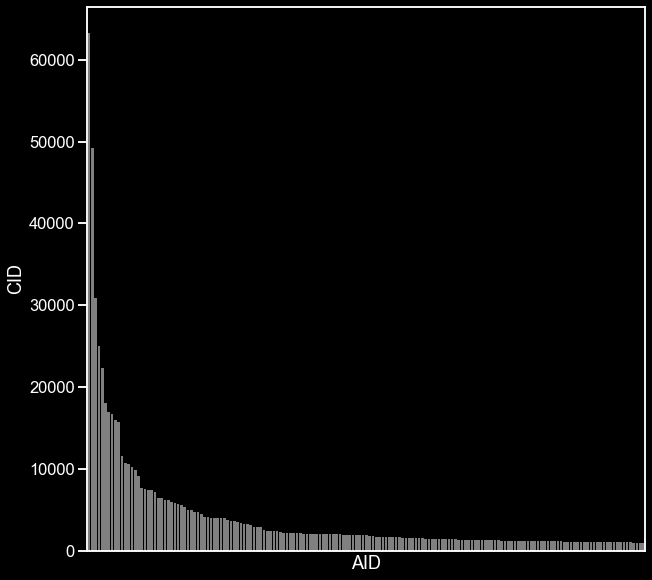

In [52]:
counts = active_cmps.groupby('AID')['CID'].nunique()
counts = counts[counts > 1000]
counts.index = counts.index.astype('category')
counts = counts.reset_index()

fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.barplot(data=counts, x='AID', y='CID',
                 color='grey',
                 lw=0,
                 order=counts.sort_values('CID', ascending=False).AID)
ax.set_xticks([])

In [42]:
counts.sort_values('CID', ascending=False)

,AID,CID
125,686978,63253
126,686979,49242
76,504332,30875
91,588342,25069
83,504834,22332
...,...,...
23,1850,1018
97,588689,1013
35,2010,1011
75,504329,1010


In [54]:
counts = active_cmps.groupby('CID')['AID'].nunique()
counts.sort_values(ascending=False)

CID
16682730.0    199
3598.0        197
11057.0       192
5455.0        183
9552079.0     183
             ... 
5329842.0       1
5329849.0       1
5329854.0       1
5329855.0       1
4807729.0       1
Name: AID, Length: 254704, dtype: int64

In [56]:
q = "select * from bioassays"

bioassays = pd.read_sql_query(q, con=config.Config.DB_URI)


In [60]:
bioassays = bioassays[bioassays.AID.isin(active_cmps.AID)]

In [61]:
bioassays.columns

Index(['index', 'AID', 'BioAssay Name', 'Deposit Date', 'Modify Date',
       'Source Name', 'Source ID', 'Substance Type', 'Outcome Type',
       'Project Category', 'BioAssay Group', 'BioAssay Types',
       'Protein Accessions', 'UniProts IDs', 'Gene IDs', 'Target TaxIDs',
       'Taxonomy IDs'],
      dtype='object')

In [69]:
counts = active_cmps.groupby('AID')['CID'].nunique()
counts = counts[counts > 1000]
counts = counts.reset_index()


m = counts.merge(bioassays[['AID', 'BioAssay Name', 'Source Name', 'BioAssay Group', 'BioAssay Types', 'UniProts IDs', 'Gene IDs']], how='left')

In [72]:
m.sort_values('CID', ascending=False).head(50)

,AID,CID,BioAssay Name,Source Name,BioAssay Group,BioAssay Types,UniProts IDs,Gene IDs
125,686978,63253,qHTS for Inhibitors of human tyrosyl-DNA phosp...,National Center for Advancing Translational Sc...,None,None,None,55775
126,686979,49242,qHTS for Inhibitors of human tyrosyl-DNA phosp...,National Center for Advancing Translational Sc...,None,None,None,55775
76,504332,30875,qHTS Assay for Inhibitors of Histone Lysine Me...,National Center for Advancing Translational Sc...,None,None,None,None
91,588342,25069,qHTS profiling assay for firefly luciferase in...,National Center for Advancing Translational Sc...,None,None,None,116160065
83,504834,22332,Primary qHTS for delayed death inhibitors of t...,National Center for Advancing Translational Sc...,None,None,None,None
82,504832,18055,Primary qHTS for delayed death inhibitors of t...,National Center for Advancing Translational Sc...,None,None,None,None
78,504339,16920,qHTS Assay for Inhibitors of JMJD2A-Tudor Domain,National Center for Advancing Translational Sc...,None,None,O75164,None
52,2551,16717,qHTS for inhibitors of ROR gamma transcription...,National Center for Advancing Translational Sc...,None,None,P51450,19885
12,1030,16026,qHTS Assay for Inhibitors of Aldehyde Dehydrog...,National Center for Advancing Translational Sc...,None,None,None,216
77,504333,15709,qHTS Assay for Inhibitors of BAZ2B,National Center for Advancing Translational Sc...,None,None,None,29994


In [74]:
data = m['Source Name'].value_counts()
data.head()

National Center for Advancing Translational Sciences (NCATS)     100
Broad Institute                                                   31
Tox21                                                             17
Southern Research Specialized Biocontainment Screening Center     17
SRMLSC                                                             3
Name: Source Name, dtype: int64

/opt/anaconda3/envs/intro-chem/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  if sys.path[0] == '':


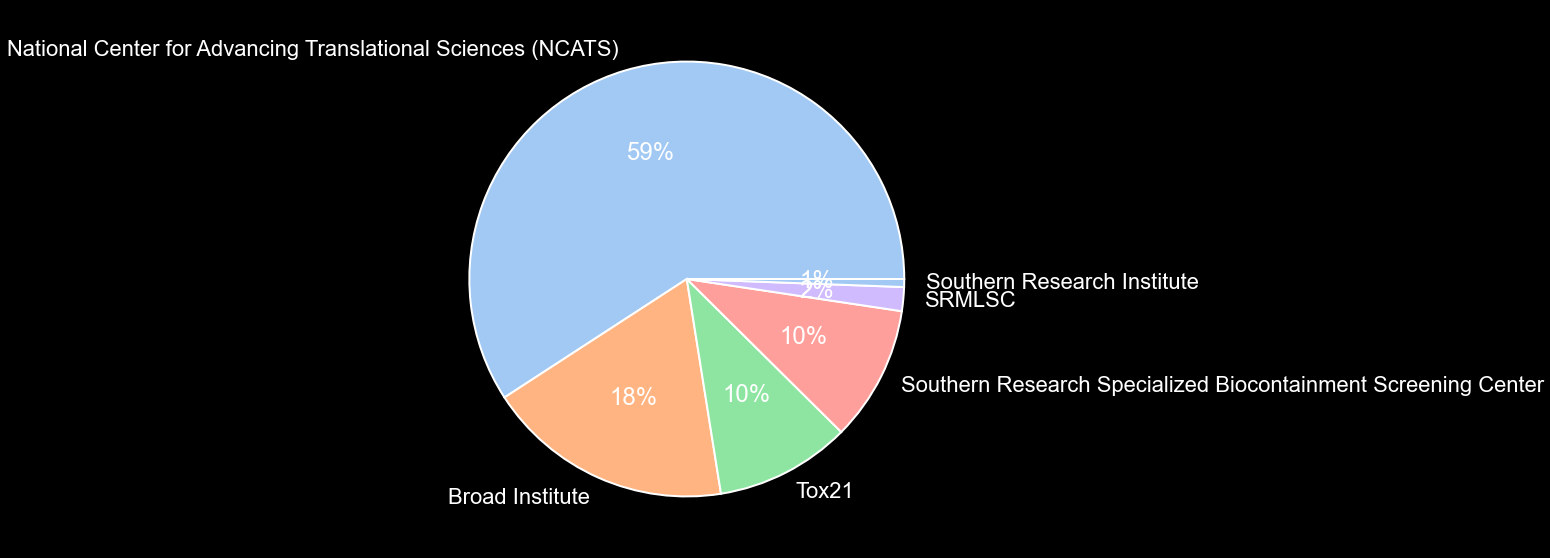

In [96]:

fig, ax = plt.subplots(figsize=(10, 10))

colors = sns.color_palette('pastel')[0:5]

#create pie chart
patches = plt.pie(data.values, labels = data.index, colors = colors, autopct='%.0f%%')

labels = ['{0} - {1:1.2f} %'.format(i, j) for i, j in zip(data.index,
                                                          100.*data.values/data.values.sum())]

# plt.legend(labels, loc='center left', bbox_to_anchor=(-0.35, .5), fontsize=8)
plt.tight_layout()
plt.savefig('../data/figures/pie.png', transparent=True, bbox_inches='tight')

In [106]:
t = active_cmps[active_cmps.AID.isin(counts.AID)].dropna()

In [107]:
t

,CID,AID,SID
232,6604905.0,1030,11114193
233,3799.0,1030,26753168
234,410055.0,1030,50108128
235,655041.0,1030,852418
236,114250.0,1030,842791
...,...,...,...
1011484,2330417.0,938,3716395
1011485,3234805.0,938,4239698
1011486,666440.0,938,865190
1011487,2435404.0,938,3716401


In [109]:
aid_list = [str(aid)for aid in t.AID.unique()]

aid_string = ", ".join(map(str, aid_list))
aid_query = f'({aid_string})'

sid_list = [str(sid)for sid in t.SID.unique()]

sid_string = ", ".join(map(str, sid_list))
sid_query = f'({sid_string})'

hill_params_query = 'SELECT  SID, AID, AC50, TOP, SLOPE, MSE ' \
                    'FROM hill_models ' \
                    'WHERE AID in {} AND SID in {} '.format(aid_query, sid_query)

hill_params = pd.read_sql_query(hill_params_query, con=config.Config.DB_URI)

# this merge is necessary because
# the former query gathers all data
# for all sid and aid that have any active cmps
# not just the pairs of active sid, aid
# could be solved by a SQLite join, but
# right now takes too long
hill_merged = pd.merge(hill_params, t[['SID', 'CID', 'AID']].drop_duplicates(['SID', 'CID', 'AID']), on=['SID', 'AID'])
print(hill_merged.head())

      SID  AID       AC50         TOP     SLOPE           MSE       CID
0  842150  411  57.698629  -95.606255  7.999998  7.892736e-09  644406.0
1  842180  411  11.939105  -61.100214  7.988266  1.871814e-09  644436.0
2  842209  411  57.681462  -81.881479  7.999998  5.816926e-09  644464.0
3  842268  411  11.123286  -42.140094  7.916468  3.461023e-09  644527.0
4  842291  411   2.617825 -105.899148  0.963853  5.957853e+00  644550.0


In [111]:
hill_merged_avg = hill_merged.groupby(['CID','AID'])['AC50'].mean().reset_index()
hill_merged_avg.head()

,CID,AID,AC50
0,6.0,449748,4.463481
1,6.0,463074,5.164316
2,6.0,485364,1.730230
3,6.0,504832,24.482201
4,6.0,540303,2.197788


In [112]:
hill_merged_avg_w = hill_merged_avg.pivot(index='CID', columns='AID')
hill_merged_avg_w.head()

AC50                                                                  \
AID  411     880     883     884     886     887     891     893     899       
CID                                                                            
6.0      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
13.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
33.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
51.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
66.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

              ...                                                      \
AID  902      ... 1347416 1347417 1645840 1645841 1645842     1671196   
CID           ...                                                       
6.0      NaN  ...     NaN     NaN     NaN     NaN     NaN         NaN   
13.0     NaN  ...     NaN     NaN     NaN     NaN     NaN         NaN   
33.0     NaN  ...     NaN     NaN     NaN     NaN     NaN         NaN   
51.0     NaN  ...     NaN     NaN     NaN     NaN     NaN  132.583619   
66.0     NaN  ...     NaN     NaN     NaN     NaN     NaN         NaN   

                                                 
AID      1671197     1671198    1671199 1671201  
CID                                              
6.0    54.018002         NaN  11.695650     NaN  
13.0  130.439230  122.763567        NaN     NaN  
33.0         NaN         NaN        NaN     NaN  
51.0         NaN         NaN        NaN     NaN  
66.0         NaN         NaN  42.249993     NaN  

[5 rows x 161 columns]

In [ ]:
sns.clustermap(np.log10(hill_merged_avg_w.fillna(10000)))

/opt/anaconda3/envs/intro-chem/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
